In [3]:
# extract data set from zip file to folder Data set
import zipfile
import os

# Define the paths
zip_file_path_train = 'Dataset/train.csv.zip'
zip_file_path_test = 'Dataset/test.csv.zip'
destination_folder = 'Dataset/'  # Ensure this folder exists

# Extract the train dataset
with zipfile.ZipFile(zip_file_path_train, 'r') as zip_ref:
    zip_ref.extractall(destination_folder)

# Extract the test dataset
with zipfile.ZipFile(zip_file_path_test, 'r') as zip_ref:
    zip_ref.extractall(destination_folder)

print("Files extracted successfully!")

Files extracted successfully!


In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
train = pd.read_csv("Dataset/train.csv")
test = pd.read_csv("Dataset/test.csv")


In [4]:
y_train = train['label']
x_train = train.drop(labels = ['label'], axis=1)
#normalize Data scale the pixel values  to the range [0,1]
x_train = x_train/255
x_test  = test/255


model = tf.keras.models.Sequential()


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn import svm

In [6]:
X_train, X_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [ ]:
# Initialize the Logistic Regression model
model = svm.SVC()  

# Train the model
model.fit(X_train, y_train)

SVC()

Accuracy: 0.973452380952381
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       816
           1       0.98      0.99      0.99       909
           2       0.98      0.97      0.97       846
           3       0.97      0.96      0.96       937
           4       0.96      0.97      0.97       839
           5       0.97      0.97      0.97       702
           6       0.98      0.99      0.98       785
           7       0.98      0.97      0.97       893
           8       0.97      0.97      0.97       835
           9       0.96      0.96      0.96       838

    accuracy                           0.97      8400
   macro avg       0.97      0.97      0.97      8400
weighted avg       0.97      0.97      0.97      8400



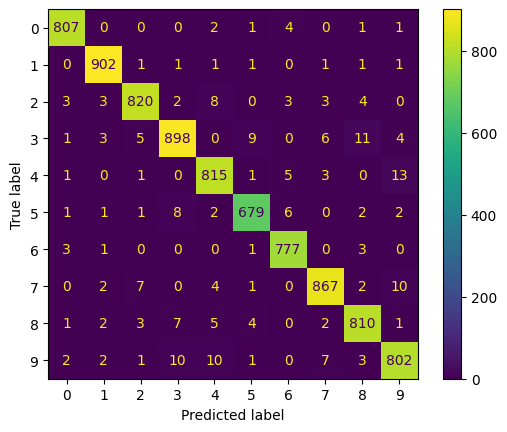

In [8]:
# Predict on the validation set
y_pred = model.predict(X_val)

# Evaluate the model
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))

# Display a confusion matrix
ConfusionMatrixDisplay.from_predictions(y_val, y_pred)

In [9]:
# Predict on the test data
test_predictions = model.predict(x_test)

# Print the first few predictions
print("Test Predictions:", test_predictions[:10])

Test Predictions: [2 0 9 9 3 7 0 3 0 3]


In [10]:
pd.DataFrame(test_predictions, columns=["Predicted"]).to_csv("test_predictions_SVM.csv", index=False)